In [5]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# import citipy
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [10]:
# import requests library
import requests

#import API key
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | channel-port aux basques
Processing Record 3 of Set 1 | sechura
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | linhares
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | zhigansk
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | okhotsk
Processing Record 12 of Set 1 | meadow lake
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | vanersborg
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | ewa beach
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | bandarbeyla
Processing Record 22 of Set 1 | araouane
Processi

Processing Record 36 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 37 of Set 4 | hobart
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | tupik
Processing Record 41 of Set 4 | fairbanks
Processing Record 42 of Set 4 | jalu
Processing Record 43 of Set 4 | katobu
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | ballina
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | moussoro
Processing Record 50 of Set 4 | xifeng
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | oxapampa
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | constitucion
Proc

Processing Record 19 of Set 12 | zhangjiakou
Processing Record 20 of Set 12 | sabang
Processing Record 21 of Set 12 | piacabucu
Processing Record 22 of Set 12 | makushino
Processing Record 23 of Set 12 | voloshka
Processing Record 24 of Set 12 | knysna
Processing Record 25 of Set 12 | kulhudhuffushi
Processing Record 26 of Set 12 | alta floresta
Processing Record 27 of Set 12 | roatan
Processing Record 28 of Set 12 | bell ville
Processing Record 29 of Set 12 | huarmey
Processing Record 30 of Set 12 | cayenne
Processing Record 31 of Set 12 | rodney
Processing Record 32 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 33 of Set 12 | victoria falls
Processing Record 34 of Set 12 | santa maria
Processing Record 35 of Set 12 | ouesso
Processing Record 36 of Set 12 | burnie
Processing Record 37 of Set 12 | amla
Processing Record 38 of Set 12 | antofagasta
Processing Record 39 of Set 12 | caarapo
Processing Record 40 of Set 12 | felidhoo
City not found. Skipping...
Processi

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,84.20,74,20,8.05,MY,2021-01-17 04:02:21
1,Channel-Port Aux Basques,47.5702,-59.1367,32.23,93,100,27.11,CA,2021-01-17 04:05:17
2,Sechura,-5.5569,-80.8222,72.16,79,98,9.95,PE,2021-01-17 04:05:17
3,Mataura,-46.1927,168.8643,57.99,89,98,5.26,NZ,2021-01-17 04:05:17
4,Linhares,-19.3911,-40.0722,70.86,94,74,0.67,BR,2021-01-17 04:00:48
5,Castro,-24.7911,-50.0119,65.73,96,100,7.67,BR,2021-01-17 04:05:17
6,Punta Arenas,-53.1500,-70.9167,50.00,76,75,3.44,CL,2021-01-17 04:02:17
7,Zhigansk,66.7697,123.3711,-38.51,81,99,5.93,RU,2021-01-17 04:05:17
8,Saint-Philippe,-21.3585,55.7679,84.20,70,0,4.61,RE,2021-01-17 04:05:17
9,Longyearbyen,78.2186,15.6401,21.20,86,75,6.91,SJ,2021-01-17 04:05:17


In [15]:
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-01-17 04:02:21,5.4112,100.3354,84.20,74,20,8.05
1,Channel-Port Aux Basques,CA,2021-01-17 04:05:17,47.5702,-59.1367,32.23,93,100,27.11
2,Sechura,PE,2021-01-17 04:05:17,-5.5569,-80.8222,72.16,79,98,9.95
3,Mataura,NZ,2021-01-17 04:05:17,-46.1927,168.8643,57.99,89,98,5.26
4,Linhares,BR,2021-01-17 04:00:48,-19.3911,-40.0722,70.86,94,74,0.67


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

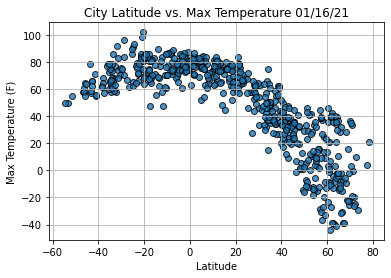

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

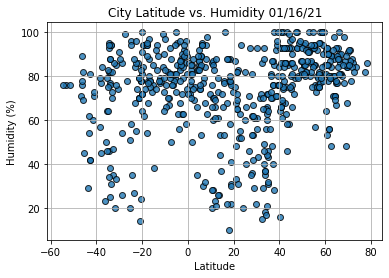

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

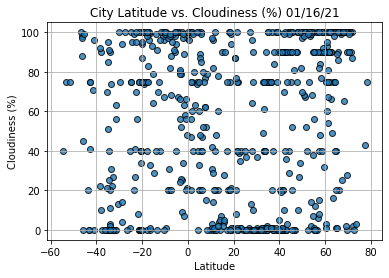

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

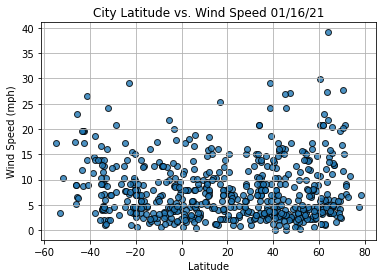

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
index13= city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-01-17 04:05:18
Lat                      -23.1203
Lng                      -134.969
Max Temp                    79.21
Humidity                       68
Cloudiness                     41
Wind Speed                   7.25
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df['Lat']>= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-01-17 04:02:21,5.4112,100.3354,84.20,74,20,8.05
1,Channel-Port Aux Basques,CA,2021-01-17 04:05:17,47.5702,-59.1367,32.23,93,100,27.11
7,Zhigansk,RU,2021-01-17 04:05:17,66.7697,123.3711,-38.51,81,99,5.93
9,Longyearbyen,SJ,2021-01-17 04:05:17,78.2186,15.6401,21.20,86,75,6.91
10,Okhotsk,RU,2021-01-17 04:05:17,59.3833,143.3000,-13.11,81,32,14.67


In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

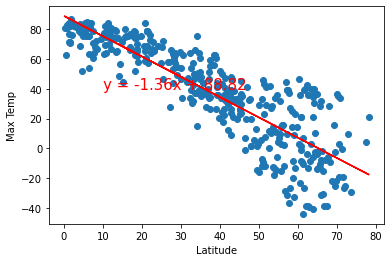

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

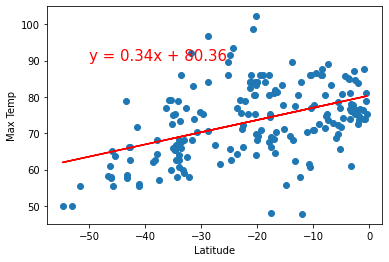

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

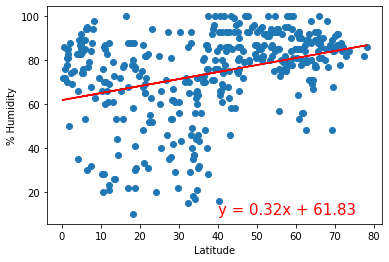

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

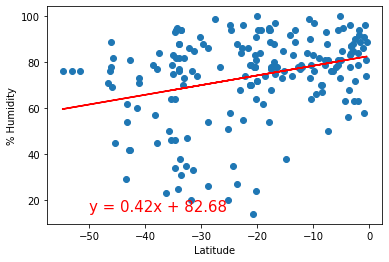

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

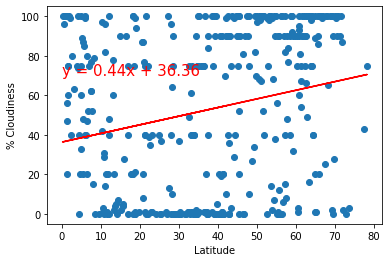

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,70))

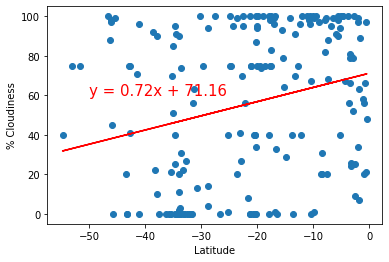

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

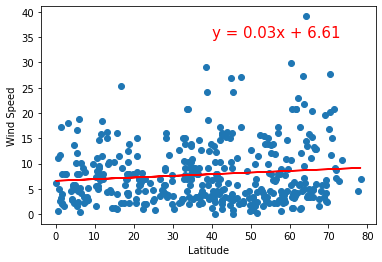

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

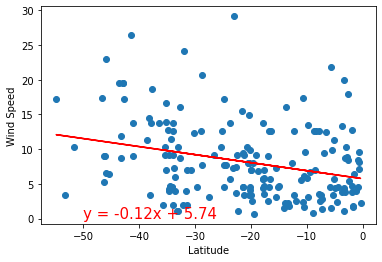

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,0))